In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import random
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
sns.set_palette("pastel")

In [2]:
metrics_df = pd.read_csv('OrigFiles/ProteinAndPathologyQuantifications.csv')
donor_df = pd.read_csv('OrigFiles/DonorInformation.csv')  
metrics_df.head()


,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,2.68,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,3.02,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,0.80,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,1.30,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,0.00,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263


In [76]:
metrics_df['structure_acronym'].value_counts()

TCx    99
HIP    94
FWM    93
PCx    91
Name: structure_acronym, dtype: int64

Plots showing distribution densities for IHC and Luminex data in different brain regions.

<AxesSubplot:xlabel='ab40_pg_per_mg', ylabel='Density'>

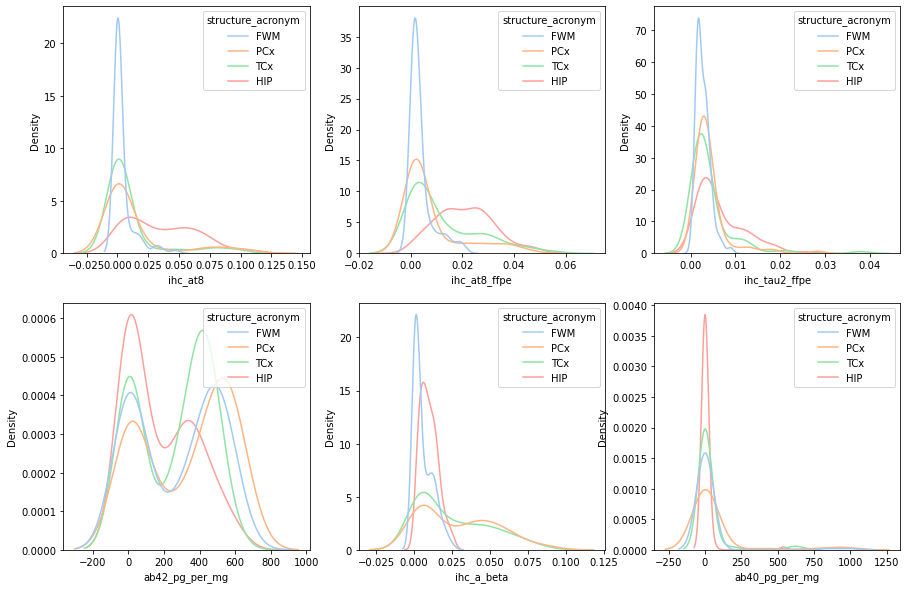

In [3]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
sns.kdeplot(data=metrics_df, x="ihc_at8",  hue="structure_acronym", ax=axs[0][0])
sns.kdeplot(data=metrics_df, x="ihc_at8_ffpe",  hue="structure_acronym", ax=axs[0][1])
sns.kdeplot(data=metrics_df, x="ihc_tau2_ffpe",  hue="structure_acronym", ax=axs[0][2])
sns.kdeplot(data=metrics_df, x="ab42_pg_per_mg",  hue="structure_acronym", ax=axs[1][0])
sns.kdeplot(data=metrics_df, x="ihc_a_beta",  hue="structure_acronym", ax=axs[1][1])
sns.kdeplot(data=metrics_df, x="ab40_pg_per_mg",  hue="structure_acronym", ax=axs[1][2])


As expected, pathological tau (AT8 IHC and pTau Luminex) tended to be higher in hippocampus while Aβ (Ab6E10 IHC and Aβ42 Luminex) is higher in cortex, consistent with known AD pathological distributions and progression.

All columns:
'donor_id', 'donor_name', 'structure_id', 'structure_acronym', 'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',        'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe', 'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg', 'il_10_pg_per_mg', 'isoprostane_pg_per_mg', il_6_pg_per_mg',
       'il_1b_pg_per_mg', 'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg', 'ab40_pg_per_mg', 'a_syn_pg_per_mg',
       'ifn_g_pg_per_mg', 'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg', 'il_7_pg_per_mg', 'ab42_pg_per_mg',
       
Columns realted to Dementia:("ihc_at8","ihc_at8_ffpe","ihc_tau2_ffpe","ihc_a_beta","ihc_a_beta_ffpe",  "ptau_ng_per_mg","tau_ng_per_mg","ab42_pg_per_mg")
  

Columns related to inflammation: ("ihc_gfap_ffpe","ihc_iba1_ffpe", "tnf_a_pg_per_mg","il_6_pg_per_mg","mip_1a_pg_per_mg",
  "il_7_pg_per_mg","mcp_1_pg_per_mg","rantes_pg_per_mg")

In [4]:
d1=donor_df["age"][donor_df['age']=="90-94"]
for i in range(0, len(d1.index)):
    donor_df.loc[d1.index[i], 'age'] = random.randint(90, 94)

d2=donor_df["age"][donor_df['age']=="95-99"]
for i in range(0, len(d2.index)):
    donor_df.loc[d2.index[i], 'age'] = random.randint(95, 99)

d3=donor_df["age"][donor_df['age']=="100+"]
for i in range(0, len(d3.index)):
    donor_df.loc[d3.index[i], 'age'] = random.randint(100, 105)

donor_df['age'] = donor_df['age'].astype(int)    

In [5]:
metrics_donor_df = pd.merge(metrics_df, donor_df,  how='left', left_on='donor_name', right_on = 'name')
metrics_donor_df.head()

,donor_id_x,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,0,No Dementia,3,No Dementia,N,White,Not Hispanic,No Dementia,3,2
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,1,Multiple Etiologies,9,Possible Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,0,0
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,0,Alzheimer's Disease Type,18,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,5,3
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,1,No Dementia,35,No Dementia,Y,White,Not Hispanic,No Dementia,3,2
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,1,No Dementia,35,No Dementia,Y,White,Not Hispanic,No Dementia,3,2


In [6]:
ab6_N = metrics_donor_df['ihc_a_beta'][(metrics_donor_df['structure_acronym']=='PCx') & (metrics_donor_df['act_demented']=='No Dementia')].reset_index(drop=True)
ab6_Y = metrics_donor_df['ihc_a_beta'][(metrics_donor_df['structure_acronym']=='PCx') & (metrics_donor_df['act_demented']=='Dementia')].reset_index(drop=True)
ab6_df=pd.concat([ab6_N,ab6_Y],axis=1)
ab6_df.columns=['No', 'Yes']
ab6_melt_df = pd.melt(ab6_df)
ab6_melt_df= ab6_melt_df.dropna()
ab6_melt_df.columns=[ 'Dementia Diagnosis?', 'Ab6E10(Parietal Cortex)']

In [7]:
at8_N = metrics_donor_df['ihc_at8'][(metrics_donor_df['structure_acronym']=='HIP') & (metrics_donor_df['act_demented']=='No Dementia')].reset_index(drop=True)
at8_Y = metrics_donor_df['ihc_at8'][(metrics_donor_df['structure_acronym']=='HIP') & (metrics_donor_df['act_demented']=='Dementia')].reset_index(drop=True)
at8_df=pd.concat([at8_N,at8_Y],axis=1)
at8_df.columns=['No', 'Yes']
at8_melt_df = pd.melt(at8_df)
at8_melt_df= at8_melt_df.dropna()
at8_melt_df.columns=[ 'Dementia Diagnosis?', 'AT8(Hippocampus)']

<AxesSubplot:title={'center':'Ab6E10 and Dementia'}, xlabel='Dementia Diagnosis?', ylabel='Ab6E10(Parietal Cortex)'>

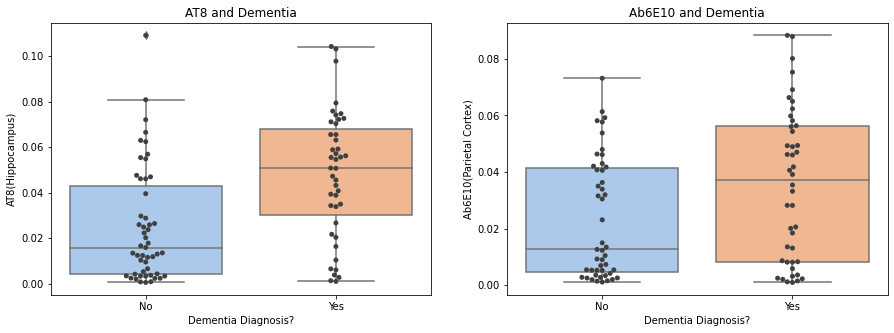

In [8]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='Dementia Diagnosis?', y='AT8(Hippocampus)', data=at8_melt_df, ax=axs[0]).set(title='AT8 and Dementia')
sns.swarmplot(x='Dementia Diagnosis?', y='AT8(Hippocampus)', data=at8_melt_df,color=".25", ax=axs[0])
sns.boxplot(x='Dementia Diagnosis?', y='Ab6E10(Parietal Cortex)', data=ab6_melt_df, ax=axs[1]).set(title='Ab6E10 and Dementia')
sns.swarmplot(x='Dementia Diagnosis?', y='Ab6E10(Parietal Cortex)', data=ab6_melt_df,color=".25", ax=axs[1])

In [25]:
tsne_df=metrics_donor_df.drop(columns=['donor_name', 'donor_id_x', 'name', 'donor_id_y', 'structure_acronym']) 


In [26]:
cat_columns = tsne_df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
tsne_df[cat_columns] = tsne_df[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [27]:
#sme_df.isna().any()
tsne_df = tsne_df.fillna(0)

In [12]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_results = tsne_model.fit_transform(tsne_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 377 samples in 0.000s...
[t-SNE] Computed neighbors for 377 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 377 / 377
[t-SNE] Mean sigma: 32.881865
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.910339
[t-SNE] KL divergence after 1000 iterations: 0.260459


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

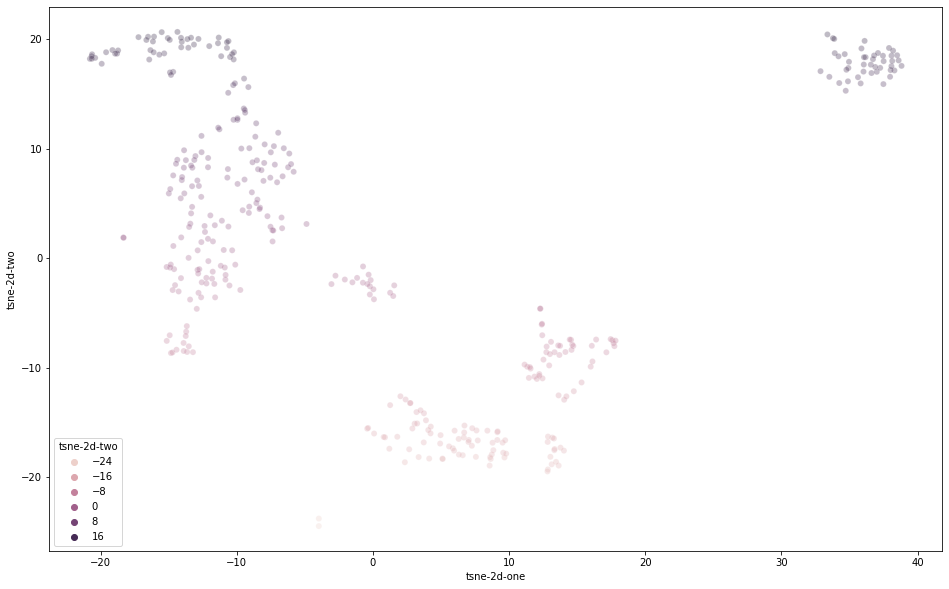

In [13]:
df_subset =pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="tsne-2d-two",
    #palette=sns.color_palette("hls"),
    data=df_subset,
    #egend="full",
    alpha=0.3
)

In [15]:
cat_columns = donor_df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
donor_df[cat_columns] = donor_df[cat_columns].apply(lambda x: pd.factorize(x)[0])
donor_df.head()

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,0,87,0,0,16,0,0,0,0,0,31,0,0,0,0,0,1,1
1,326765656,1,98,0,0,17,12,1,2,1,0,26,0,1,0,0,0,5,2
2,326765654,2,85,0,1,10,72,2,3,1,1,25,1,1,0,0,1,4,2
3,467056391,3,94,1,0,11,87,2,0,1,0,52,0,1,0,0,0,4,0
4,309335447,4,103,0,1,16,0,0,3,0,2,28,2,0,0,0,1,4,2


In [16]:
tsne_donor_df=donor_df.drop(columns=['name', 'donor_id']) 
tsne_donor_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_donor_results = tsne_donor_model.fit_transform(tsne_donor_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 107 samples in 0.000s...
[t-SNE] Computed neighbors for 107 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 107 / 107
[t-SNE] Mean sigma: 13.011383
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.301174
[t-SNE] KL divergence after 950 iterations: 0.148975


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

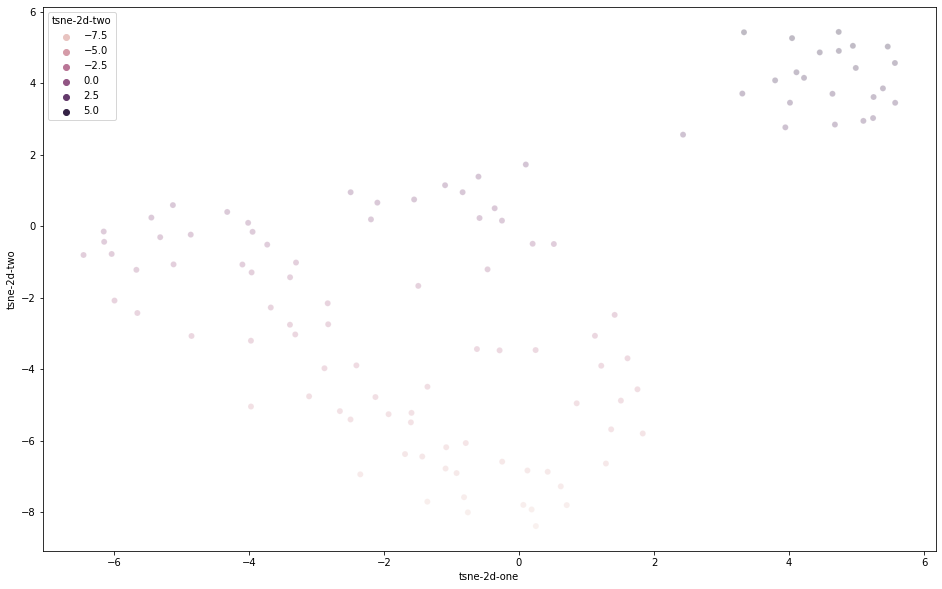

In [17]:
df_donor_subset =pd.DataFrame()
df_donor_subset['tsne-2d-one'] = tsne_donor_results[:,0]
df_donor_subset['tsne-2d-two'] = tsne_donor_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="tsne-2d-two",
    #palette=sns.color_palette("hls"),
    data=df_donor_subset,
    #egend="full",
    alpha=0.3
)

In [18]:
cat_columns = metrics_df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
metrics_df[cat_columns] = metrics_df[cat_columns].apply(lambda x: pd.factorize(x)[0])
metrics_df.head()

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,309335467,0,10557,0,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,2.68,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251
1,309335480,1,10208,1,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,3.02,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875
2,309335493,2,10557,0,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,0.80,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514
3,326765668,3,10557,0,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,1.30,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571
4,326765668,3,10235,2,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,0.00,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263


In [20]:
tsne_metrics_df=metrics_df.drop(columns=['donor_name', 'donor_id']) 
tsne_metrics_df = tsne_metrics_df.fillna(0)
tsne_metrics_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_metrics_results = tsne_metrics_model.fit_transform(tsne_metrics_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 377 samples in 0.000s...
[t-SNE] Computed neighbors for 377 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 377 / 377
[t-SNE] Mean sigma: 24.084497
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.748657
[t-SNE] KL divergence after 1000 iterations: 0.244460


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

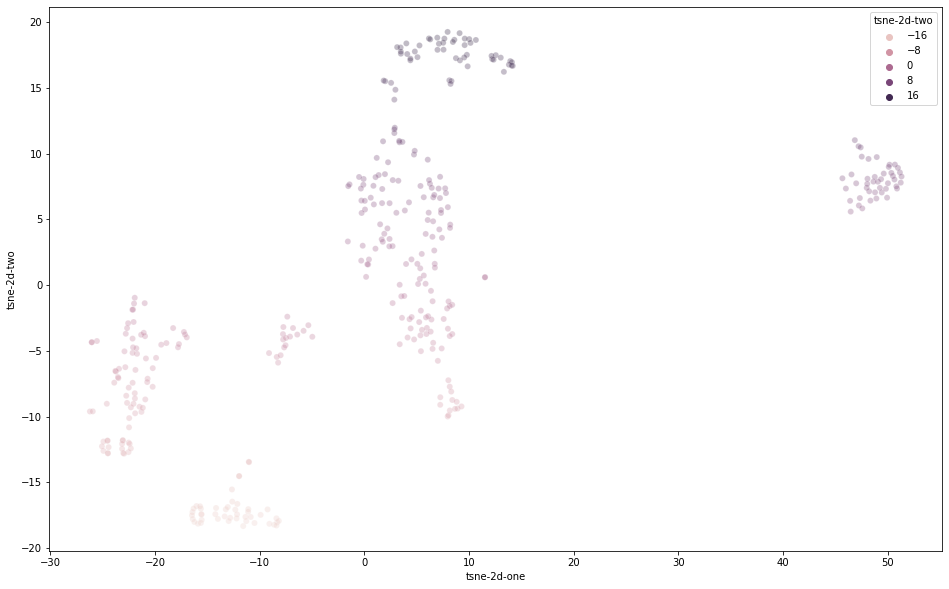

In [21]:
df_metrics_subset =pd.DataFrame()
df_metrics_subset['tsne-2d-one'] = tsne_metrics_results[:,0]
df_metrics_subset['tsne-2d-two'] = tsne_metrics_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="tsne-2d-two",
    #palette=sns.color_palette("hls"),
    data=df_metrics_subset,
    #egend="full",
    alpha=0.3
)

In [30]:
km_list =[]
Sum_of_squared_distances=[]
db_score_list =[]
ch_score_list =[]
K = range(2,9)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(tsne_df)
    km_list.append(km)
    Sum_of_squared_distances.append(km.inertia_)
    db_score = metrics.davies_bouldin_score(tsne_df, km.labels_)
    db_score_list.append(db_score)
    ch_score =metrics.calinski_harabasz_score(tsne_df, km.labels_)
    ch_score_list.append(ch_score)
    #si_score = metrics.silhouette_score(w2v_vectors, km.labels_)
    #si_score_list.append(si_score)
    #print("clusters :", km.labels_.shape,  db_score, ch_score, si_score)
    print("clusters :", km.labels_.shape,  db_score, ch_score)

clusters : (377,) 0.9496352232222899 285.2551745259009
clusters : (377,) 1.0587631050630117 267.2808084557869
clusters : (377,) 0.8786814160315508 287.77710173757254
clusters : (377,) 0.7959038918432995 278.5762558396053
clusters : (377,) 0.9478590292169006 277.282665675417
clusters : (377,) 0.8958196765781966 273.7516377604757
clusters : (377,) 0.8697867179587058 259.9092230873123


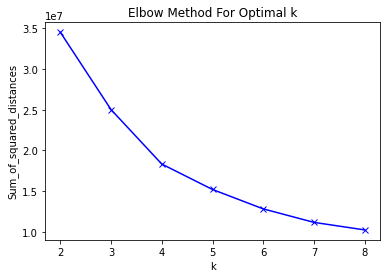

In [31]:
#First, we must decide on the number of clusters. Here, we will use the elbow method.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<AxesSubplot:>

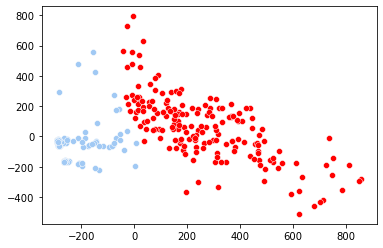

In [54]:
pca = PCA(2)
 
#Transform the data
pca_df = pca.fit_transform(tsne_df)
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(pca_df)

filtered_label0 = pca_df[label == 0]
 
#plotting the results
sns.scatterplot(filtered_label0[:,0] , filtered_label0[:,1])

filtered_label1 = pca_df[label == 1]
 

#Plotting the results
sns.scatterplot(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')

In [53]:
print(filtered_label0.shape)
print(filtered_label2.shape)


(65, 2)
(185, 2)


<AxesSubplot:>

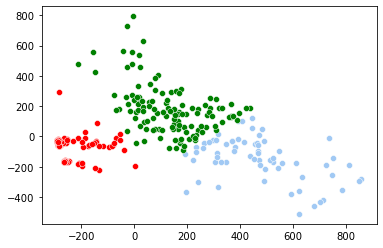

In [55]:
#pca_df = pca.fit_transform(tsne_df)
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(pca_df)

filtered_label0 = pca_df[label == 0]
 
#plotting the results
sns.scatterplot(filtered_label0[:,0] , filtered_label0[:,1])

filtered_label1 = pca_df[label == 1]
 

#Plotting the results
sns.scatterplot(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')

filtered_label2 = pca_df[label == 2]
 

#Plotting the results
sns.scatterplot(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')

In [ ]:
#ab42_over_ab40_ratio","isoprostane_pg_per_mg","ptau_over_tau_ratio

kpDementia=c("ihc_at8","ihc_at8_ffpe","ihc_tau2_ffpe","ihc_a_beta","ihc_a_beta_ffpe",
  "ptau_ng_per_mg","tau_ng_per_mg","ab42_pg_per_mg")
  # Pathology excluded from plot: "ab40_pg_per_mg","ihc_a_syn","a_syn_pg_per_mg","ihc_ptdp_43_ffpe"

kpInflam=c("ihc_gfap_ffpe","ihc_iba1_ffpe",
  "tnf_a_pg_per_mg","il_6_pg_per_mg","mip_1a_pg_per_mg",
  "il_7_pg_per_mg","mcp_1_pg_per_mg","rantes_pg_per_mg")
